In [1]:
# Load libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

from linear_regression import LinearRegression as LR; # Our implementation

import warnings;

pd.set_option('max_column', None);
warnings.filterwarnings('ignore');

In [2]:
# Load data
fish = pd.read_csv('data/pre_fish.csv');
metro = pd.read_csv('data/pre_metro.csv');
air = pd.read_csv('data/pre_air.csv');
housing = pd.read_csv('data/pre_housing.csv');

In [3]:
# Split data
X_fish = fish[fish.columns.difference(['Weight'])];
y_fish = fish['Weight'];

X_metro = metro[metro.columns.difference(['date_time', 'hour', 'traffic_volume'])];
y_metro = metro['traffic_volume'];

X_air = air[air.columns.difference(['C6H6(GT)', 'Date'])];
y_air = air['C6H6(GT)']

X_housing = housing[housing.columns.difference(['MEDV'])];
y_housing = housing['MEDV'];

In [4]:
data = [(X_fish, y_fish, 'Fish'), (X_metro, y_metro, 'Metro'),
        (X_air, y_air, 'Air'), (X_housing, y_housing, 'Housing')];

In [5]:
def fiting(data, n_iter=100, lr=0.001, moment=0.90, batch=10, scoring='rmse'):
    
    plt.figure(1, figsize=(15, 12));
    
    for idx, (X, y, name) in enumerate(data):
    
        # Gradient Descent
        gd = LR(n_iter=n_iter, learning_rate=lr, opt='gd', scoring=scoring);
        gd.fit(X, y);

        # Stochastic Gradient Descent
        sgd = LR(n_iter=n_iter, learning_rate=lr, opt='sgd', batch=1, scoring=scoring);
        sgd.fit(X, y);

        # Mini-Batch Stochastic Gradient Descent
        sgd_m = LR(n_iter=n_iter, learning_rate=lr, opt='sgd', batch=batch, scoring=scoring);
        sgd_m.fit(X, y);

        # Momentum
        mom = LR(n_iter=n_iter, learning_rate=lr, opt='momentum', momentum=moment, batch=batch, scoring=scoring);
        mom.fit(X, y);

        # Nesterov Accelerated Gradient Descent
        nest = LR(n_iter=n_iter, learning_rate=lr, opt='nesterov', momentum=moment, batch=batch, scoring=scoring);
        nest.fit(X, y);

        # Ploting Descend Gradient
        plt.subplot(2, 2, idx+1);
        plt.plot(np.arange(len(gd.costs_)), gd.costs_, label='GD');
        plt.plot(np.arange(len(sgd.costs_)), sgd.costs_, label='SGD');
        plt.plot(np.arange(len(sgd_m.costs_)), sgd_m.costs_, label='SGD-MiniBatch');
        plt.plot(np.arange(len(mom.costs_)), mom.costs_, label='Momentum');
        plt.plot(np.arange(len(nest.costs_)), nest.costs_, label='Nesterov');

        plt.title(name);
        plt.xlabel('Iterations');
        plt.ylabel('Cost');
        plt.legend();
    
    plt.show()
    

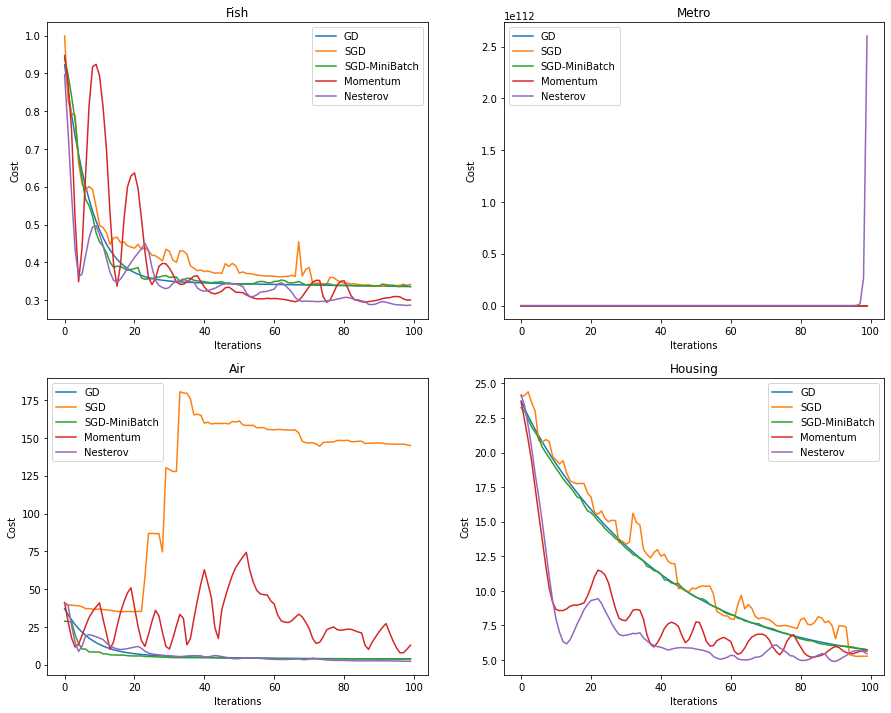

In [6]:
fiting(data, lr=0.01, batch=8)

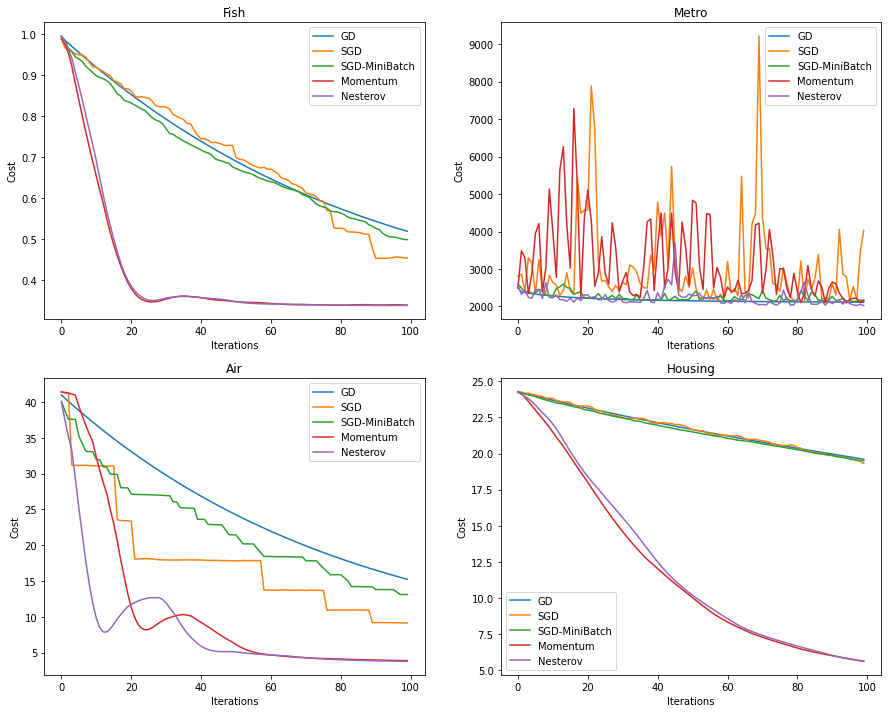

In [7]:
fiting(data, lr=0.001, batch=8)

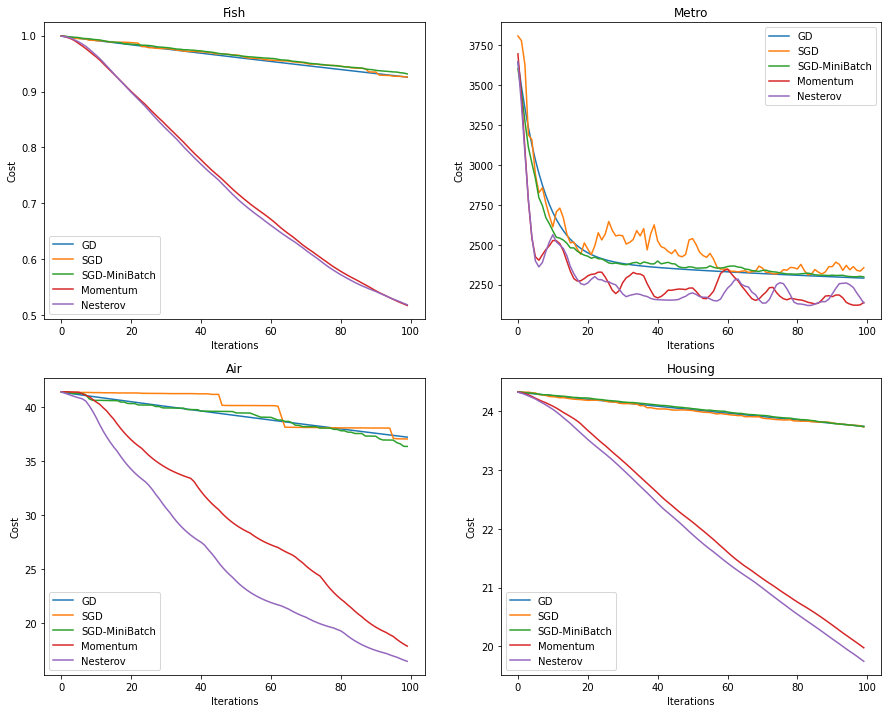

In [8]:
fiting(data, lr=0.0001, batch=8)